In [3]:
%matplotlib inline

In [4]:
# my imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hashlib
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [5]:
# Download necessary NLTK data files (only needed once)
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [6]:
reviews_pr_1 = pd.read_csv('data/reviews_for_scifi/scifi_0-20.csv')

In [7]:
reviews_pr_1.shape

(1800, 8)

In [8]:
reviews_pr_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1800.0,899.500000,519.759560,0.0,449.75,899.5,1349.25,1799.0
stars_given,1770.0,3.975706,1.156483,1.0,3.00,4.0,5.00,5.0


<Axes: >

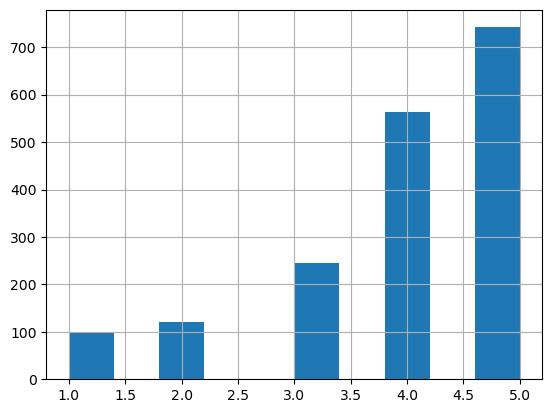

In [9]:
reviews_pr_1.stars_given.hist()

In [10]:
reviews_pr_2 = pd.read_csv('data/reviews_for_scifi/scifi_20-40.csv')

In [11]:
reviews_pr_2.shape

(1800, 8)

In [12]:
reviews_pr_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1800.0,899.500000,519.759560,0.0,449.75,899.5,1349.25,1799.0
stars_given,1767.0,3.942841,1.099064,1.0,3.00,4.0,5.00,5.0


In [13]:
reviews_pr_3 = pd.read_csv('data/reviews_for_scifi/scifi_40-60.csv')

In [14]:
reviews_pr_3.shape

(1800, 8)

In [15]:
reviews_pr_3.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1800.0,899.500000,519.75956,0.0,449.75,899.5,1349.25,1799.0
stars_given,1775.0,3.969577,1.06929,1.0,3.00,4.0,5.00,5.0


In [16]:
reviews_pr_4 = pd.read_csv('data/reviews_for_scifi/scifi_40-60.csv')

In [17]:
reviews_pr_4.shape

(1800, 8)

In [18]:
reviews_pr_4.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1800.0,899.500000,519.75956,0.0,449.75,899.5,1349.25,1799.0
stars_given,1775.0,3.969577,1.06929,1.0,3.00,4.0,5.00,5.0


In [19]:
reviews_pr_5 = pd.read_csv('data/reviews_for_scifi/scifi_60-80.csv')

In [20]:
reviews_pr_5.shape

(1800, 8)

In [21]:
reviews_pr_5.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1800.0,899.500000,519.759560,0.0,449.75,899.5,1349.25,1799.0
stars_given,1777.0,3.853123,1.070874,1.0,3.00,4.0,5.00,5.0


In [22]:
reviews_pr_6 = pd.read_csv('data/reviews_for_scifi/scifi_80-100.csv')

In [23]:
reviews_pr_6.shape

(1800, 8)

In [24]:
reviews_pr_6.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1800.0,899.500000,519.759560,0.0,449.75,899.5,1349.25,1799.0
stars_given,1766.0,3.831823,1.081666,1.0,3.00,4.0,5.00,5.0


In [25]:
reviews_pr_1.columns

Index(['Unnamed: 0', 'book_title', 'date', 'rname', 'rating', 'review',
       'likes', 'stars_given'],
      dtype='object')

In [26]:
reviews_pr_2.columns

Index(['Unnamed: 0', 'book_title', 'date', 'rname', 'rating', 'review',
       'likes', 'stars_given'],
      dtype='object')

In [27]:
reviews_pr_3.columns

Index(['Unnamed: 0', 'book_title', 'date', 'rname', 'rating', 'review',
       'likes', 'stars_given'],
      dtype='object')

In [28]:
reviews_pr_4.columns

Index(['Unnamed: 0', 'book_title', 'date', 'rname', 'rating', 'review',
       'likes', 'stars_given'],
      dtype='object')

In [29]:
reviews_pr_5.columns

Index(['Unnamed: 0', 'book_title', 'date', 'rname', 'rating', 'review',
       'likes', 'stars_given'],
      dtype='object')

In [30]:
reviews_pr_6.columns

Index(['Unnamed: 0', 'book_title', 'date', 'rname', 'rating', 'review',
       'likes', 'stars_given'],
      dtype='object')

In [31]:
dfs = [reviews_pr_1, reviews_pr_2, reviews_pr_3, reviews_pr_4, reviews_pr_5, reviews_pr_6]

In [32]:
reviews_merged = pd.concat(dfs, ignore_index = True)

In [33]:
reviews_merged.shape

(10800, 8)

In [34]:
reviews_merged.dtypes

Unnamed: 0       int64
book_title      object
date            object
rname           object
rating          object
review          object
likes           object
stars_given    float64
dtype: object

In [35]:
reviews_merged = reviews_merged.drop('Unnamed: 0', axis=1)

In [36]:
reviews_merged.columns

Index(['book_title', 'date', 'rname', 'rating', 'review', 'likes',
       'stars_given'],
      dtype='object')

In [37]:
reviews_merged = reviews_merged.drop('likes', axis=1)

In [38]:
reviews_merged

,book_title,date,rname,rating,review,stars_given
0,Dune,"Mar 22, 2011",Rajat Ubhaykar,it was amazing,"In my head, the purpose of this review is very...",5.0
1,Dune,"Apr 29, 2014",Jay,did not like it,If this is the gold standard against which all...,1.0
2,Dune,"Nov 20, 2008",Manny,really liked it,There's a characteristically witty essay by Bo...,4.0
3,Dune,"Jun 24, 2007",John Wiswell,it was ok,No one should argue the importance Dune. It la...,2.0
4,Dune,"Nov 13, 2021",Lala BooksandLala,it was amazing,just when you thought 2021 couldn't get any we...,5.0
...,...,...,...,...,...,...
10795,The Demolished Man,"Dec 23, 2018",Gareth Howells,really liked it,"Stunning book, and although written in 1952, i...",4.0
10796,The Demolished Man,"Feb 28, 2020",Emlyn Roberts,it was amazing,A mind bending story of murder and deceit. An ...,5.0
10797,The Demolished Man,"Aug 10, 2019",Sue Chant,it was amazing,Interesting ideas and well written though jumb...,5.0
10798,The Demolished Man,"Jul 06, 2020",Anna,liked it,The only reason I finished this is because I w...,3.0


In [39]:
anonimyzer_func = lambda x: hashlib.sha256(x.encode()).hexdigest()

In [40]:
reviews_merged.dtypes

book_title      object
date            object
rname           object
rating          object
review          object
stars_given    float64
dtype: object

In [41]:
reviews_merged['rname'] = reviews_merged['rname'].astype('string')

In [42]:
reviews_merged.dtypes

book_title             object
date                   object
rname          string[python]
rating                 object
review                 object
stars_given           float64
dtype: object

In [43]:
reviews_merged = reviews_merged.dropna()

In [44]:
reviews_merged['reviewer_anonymous'] = reviews_merged['rname'].apply(anonimyzer_func)

C:\Users\Owner\AppData\Local\Temp\ipykernel_8200\2805786451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_merged['reviewer_anonymous'] = reviews_merged['rname'].apply(anonimyzer_func)


In [45]:
reviews_merged.head()

,book_title,date,rname,rating,review,stars_given,reviewer_anonymous
0,Dune,"Mar 22, 2011",Rajat Ubhaykar,it was amazing,"In my head, the purpose of this review is very...",5.0,c5cdbdf3fc731351e44b01b9d786e167adf2c74434a318...
1,Dune,"Apr 29, 2014",Jay,did not like it,If this is the gold standard against which all...,1.0,0c9ab8c55d678ea513149008ce0ca19990aabc50f6bde8...
2,Dune,"Nov 20, 2008",Manny,really liked it,There's a characteristically witty essay by Bo...,4.0,06db99a23f69d8ddd8212272bd26a7ea2c02b37a146bbf...
3,Dune,"Jun 24, 2007",John Wiswell,it was ok,No one should argue the importance Dune. It la...,2.0,80dcb1d46270dfe2f2afd3349e4f3c3500ae8c853e8575...
4,Dune,"Nov 13, 2021",Lala BooksandLala,it was amazing,just when you thought 2021 couldn't get any we...,5.0,f917d3a786598500bb9dd905651958265a1ae3289c8964...


In [46]:
reviews_tidy = reviews_merged.drop('rname', axis=1)

In [47]:
reviews_tidy = reviews_tidy.drop('rating', axis=1)

In [48]:
reviews_tidy = reviews_tidy[['date', 'book_title', 'reviewer_anonymous', 'review', 'stars_given']]

In [49]:
reviews_tidy.head()

,date,book_title,reviewer_anonymous,review,stars_given
0,"Mar 22, 2011",Dune,c5cdbdf3fc731351e44b01b9d786e167adf2c74434a318...,"In my head, the purpose of this review is very...",5.0
1,"Apr 29, 2014",Dune,0c9ab8c55d678ea513149008ce0ca19990aabc50f6bde8...,If this is the gold standard against which all...,1.0
2,"Nov 20, 2008",Dune,06db99a23f69d8ddd8212272bd26a7ea2c02b37a146bbf...,There's a characteristically witty essay by Bo...,4.0
3,"Jun 24, 2007",Dune,80dcb1d46270dfe2f2afd3349e4f3c3500ae8c853e8575...,No one should argue the importance Dune. It la...,2.0
4,"Nov 13, 2021",Dune,f917d3a786598500bb9dd905651958265a1ae3289c8964...,just when you thought 2021 couldn't get any we...,5.0


In [50]:
reviews_tidy.dtypes

date                   object
book_title             object
reviewer_anonymous     object
review                 object
stars_given           float64
dtype: object

In [51]:
reviews_tidy.date = pd.to_datetime(reviews_tidy.date)

In [52]:
reviews_tidy.dtypes

date                  datetime64[ns]
book_title                    object
reviewer_anonymous            object
review                        object
stars_given                  float64
dtype: object

In [53]:
reviews_tidy

,date,book_title,reviewer_anonymous,review,stars_given
0,2011-03-22,Dune,c5cdbdf3fc731351e44b01b9d786e167adf2c74434a318...,"In my head, the purpose of this review is very...",5.0
1,2014-04-29,Dune,0c9ab8c55d678ea513149008ce0ca19990aabc50f6bde8...,If this is the gold standard against which all...,1.0
2,2008-11-20,Dune,06db99a23f69d8ddd8212272bd26a7ea2c02b37a146bbf...,There's a characteristically witty essay by Bo...,4.0
3,2007-06-24,Dune,80dcb1d46270dfe2f2afd3349e4f3c3500ae8c853e8575...,No one should argue the importance Dune. It la...,2.0
4,2021-11-13,Dune,f917d3a786598500bb9dd905651958265a1ae3289c8964...,just when you thought 2021 couldn't get any we...,5.0
...,...,...,...,...,...
10794,2019-04-02,The Demolished Man,b51ca4e22a93d820f1e17c65e36fa658c43e766240abdb...,"This is a very fun noir/SF mashup, with plenty...",4.0
10795,2018-12-23,The Demolished Man,acd21ac9cbe3c1c19e679f1d79f3b250b01af5b2f31e9e...,"Stunning book, and although written in 1952, i...",4.0
10796,2020-02-28,The Demolished Man,2d37494c07bad590980222b24b3f21ace1d77139b484be...,A mind bending story of murder and deceit. An ...,5.0
10797,2019-08-10,The Demolished Man,b8d51db09df4a0d7a41b3a06e1b733e607077c8145d360...,Interesting ideas and well written though jumb...,5.0


In [54]:
reviews_tidy = reviews_tidy.reset_index().rename(columns={'index': '#'})

In [55]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation_table = str.maketrans('', '', string.punctuation)

In [56]:
# Function to preprocess text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing punctuation
    text = text.translate(punctuation_table)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stopwords and lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Joining tokens back to a single string
    return ' '.join(cleaned_tokens)

In [57]:
reviews_tidy['cleaned_review'] = reviews_tidy['review'].apply(preprocess_text)

In [58]:
reviews_tidy.to_csv('data/cleaned_reviews_for_training_scifi.csv', index = None)